In [1]:
import pandas as pd
import numpy as np
import warnings
import os

import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display


warnings.simplefilter("ignore")

In [2]:
def read_file(path, mode="r", encoding="utf-8", **kwargs):
    with open(path, mode=mode, encoding=encoding, **kwargs) as file:
        data = file.read()
        
    return data

# Competition data

In [3]:
feedback_prize_ell_directory = "../input/feedback-prize-english-language-learning/"
feedback_prize_ell_train_path = os.path.join(feedback_prize_ell_directory, "train.csv")
feedback_prize_ell_test_path = os.path.join(feedback_prize_ell_directory, "test.csv")

feedback_prize_ell_train = pd.read_csv(feedback_prize_ell_train_path)
feedback_prize_ell_train["source"] = "Feedback Prize ELL"

feedback_prize_ell_test = pd.read_csv(feedback_prize_ell_test_path)
feedback_prize_ell_test["source"] = "Feedback Prize ELL"

display(feedback_prize_ell_test.head())

,text_id,full_text,source
0,0000C359D63E,when a person has no experience on a job their...,Feedback Prize ELL
1,000BAD50D026,Do you think students would benefit from being...,Feedback Prize ELL
2,00367BB2546B,"Thomas Jefferson once states that ""it is wonde...",Feedback Prize ELL


# Feedback Prize 2021

In [5]:
feedback_prize_2021_directory = "../input/feedback-prize-2021/"
feedback_prize_2021_train_directory = os.path.join(feedback_prize_2021_directory, "train")
feedback_prize_2021_train_path = os.path.join(feedback_prize_2021_directory, "train.csv")

feedback_prize_2021_train = pd.read_csv(feedback_prize_2021_train_path)
feedback_prize_2021_train = feedback_prize_2021_train.drop_duplicates(subset=["id"], keep="first")
feedback_prize_2021_train = feedback_prize_2021_train.reset_index(drop=True)

feedback_prize_ell_ids = feedback_prize_ell_train["text_id"].values
feedback_prize_intersect_mask = feedback_prize_2021_train["id"].isin(feedback_prize_ell_ids)
feedback_prize_2021_train = feedback_prize_2021_train[~feedback_prize_intersect_mask].reset_index(drop=True)

columns = ["id"]
feedback_prize_2021_train = feedback_prize_2021_train[columns]
get_essay_path = lambda id, directory: os.path.join(directory, f"{id}.txt")
feedback_prize_2021_train["path"] = feedback_prize_2021_train["id"].apply(lambda id: get_essay_path(id, feedback_prize_2021_train_directory))
feedback_prize_2021_train["full_text"] = feedback_prize_2021_train["path"].apply(read_file)

columns = ["text_id", "full_text", "source"]
feedback_prize_2021_train = feedback_prize_2021_train.rename(columns={"id": "text_id"})
feedback_prize_2021_train["source"] = "Feedback Prize 2021"
feedback_prize_2021_train = feedback_prize_2021_train[columns]

display(feedback_prize_2021_train)

,text_id,full_text,source
0,423A1CA112E2,Phones\n\nModern humans today are always on th...,Feedback Prize 2021
1,A8445CABFECE,Phones & Driving\n\nDrivers should not be able...,Feedback Prize 2021
2,6B4F7A0165B9,Cell Phone Operation While Driving\n\nThe abil...,Feedback Prize 2021
3,E05C7F5C1156,People are debating whether if drivers should ...,Feedback Prize 2021
4,50B3435E475B,Texting and driving\n\nOver half of drivers in...,Feedback Prize 2021
...,...,...,...
15137,0814426B27DF,Most people ask more than one person for advic...,Feedback Prize 2021
15138,8F4B595CF9E7,Do you ever want more opinions and options whe...,Feedback Prize 2021
15139,6B5809C83978,Has anyone ever gave you advice? Was the advic...,Feedback Prize 2021
15140,AFEC37C2D43F,There has been at least one point in everyone'...,Feedback Prize 2021


# Essayscsv

In [6]:
essayscsv_path = "../input/essayscsv/essays.csv"
essayscsv = pd.read_csv(essayscsv_path, encoding="cp1252")

columns = ["#AUTHID", "TEXT"]
essayscsv = essayscsv[columns]

rename_columns = {
    "#AUTHID": "text_id",
    "TEXT": "full_text",
}

essayscsv = essayscsv.rename(columns=rename_columns)
essayscsv["text_id"] = essayscsv["text_id"].apply(lambda x: x.split(".")[0])
essayscsv["source"] = "essayscsv"

display(essayscsv)

,text_id,full_text,source
0,1997_504851,"Well, right now I just woke up from a mid-day ...",essayscsv
1,1997_605191,"Well, here we go with the stream of consciousn...",essayscsv
2,1997_687252,An open keyboard and buttons to push. The thin...,essayscsv
3,1997_568848,I can't believe it! It's really happening! M...,essayscsv
4,1997_688160,"Well, here I go with the good old stream of co...",essayscsv
...,...,...,...
2462,2004_493,I'm home. wanted to go to bed but remembe...,essayscsv
2463,2004_494,Stream of consiousnesssskdj. How do you s...,essayscsv
2464,2004_497,"It is Wednesday, December 8th and a lot has be...",essayscsv
2465,2004_498,"Man this week has been hellish. Anyways, now i...",essayscsv


# IvyPanda

In [7]:
ivypanda_directory = "../input/ivypanda/"

ivypanda_1pages_essays_path = os.path.join(ivypanda_directory, "ivypanda_1pages_essays.csv")
ivypanda_1pages_essays = pd.read_csv(ivypanda_1pages_essays_path)

ivypanda_2pages_essays_path = os.path.join(ivypanda_directory, "ivypanda_2pages_essays.csv")
ivypanda_2pages_essays = pd.read_csv(ivypanda_2pages_essays_path)

ivypanda_3pages_essays_path = os.path.join(ivypanda_directory, "ivypanda_3pages_essays.csv")
ivypanda_3pages_essays = pd.read_csv(ivypanda_3pages_essays_path)

ivypanda_4pages_essays_path = os.path.join(ivypanda_directory, "ivypanda_4pages_essays.csv")
ivypanda_4pages_essays = pd.read_csv(ivypanda_4pages_essays_path)

ivypanda_5pages_essays_path = os.path.join(ivypanda_directory, "ivypanda_5pages_essays.csv")
ivypanda_5pages_essays = pd.read_csv(ivypanda_5pages_essays_path)

ivypanda_6pages_essays_path = os.path.join(ivypanda_directory, "ivypanda_6pages_essays.csv")
ivypanda_6pages_essays = pd.read_csv(ivypanda_6pages_essays_path)

ivypanda_datasets = [
    ivypanda_1pages_essays, ivypanda_2pages_essays, ivypanda_3pages_essays, 
    ivypanda_4pages_essays, ivypanda_5pages_essays, ivypanda_6pages_essays,
]

ivypanda = pd.concat(ivypanda_datasets, axis=0)

nan_text_mask = ivypanda["text"].isna()
ivypanda = ivypanda[~nan_text_mask]
ivypanda = ivypanda.drop_duplicates(subset=["text"])
ivypanda = ivypanda.reset_index(drop=True)

rename_columns = {"index": "text_id", "text": "full_text"}
ivypanda = ivypanda.rename(columns=rename_columns)
ivypanda["source"] = "IvyPanda"
ivypanda["text_id"] = range(len(ivypanda))

columns = ["text_id", "full_text", "source"]
ivypanda = ivypanda[columns]

display(ivypanda)

,text_id,full_text,source
0,0,"In his report Dr Jones (1), raises concern ove...",IvyPanda
1,1,"People are curious about a lot of things, some...",IvyPanda
2,2,A true profession is characterized by a lifeti...,IvyPanda
3,3,The Tang dynasty started ruling China from 618...,IvyPanda
4,4,"In the story Mrs. Dutta writes aletter,we enco...",IvyPanda
...,...,...,...
94762,94762,The homeless community is one of the most seve...,IvyPanda
94763,94763,"For this assignment, I have watched several co...",IvyPanda
94764,94764,Introduction\n\nThe paper discusses the labor ...,IvyPanda
94765,94765,Income and substitution effects as a result of...,IvyPanda


# StudentShare

In [8]:
studentshare_path = "../input/studentshare/studentshare_essays.csv"
studentshare = pd.read_csv(studentshare_path)
studentshare["source"] = "StudentShare"

studentshare = studentshare.rename(columns={"text": "full_text"})
studentshare["text_id"] = range(0, len(studentshare))

columns = ["text_id", "full_text", "source"]
studentshare = studentshare[columns]

display(studentshare)

,text_id,full_text,source
0,0,Goals of Education INTRODUCTION The Cal Grant ...,StudentShare
1,1,Child Obesity. Articles Overview Introduction ...,StudentShare
2,2,"24 April, In order to communicate effectively ...",StudentShare
3,3,"Euthyphro – Plato On the one hand, Euthyphro a...",StudentShare
4,4,Ali Bujassoum Kelly Gehlhoff ENG 101 28th Apri...,StudentShare
...,...,...,...
32972,32972,The paper 'The Cost of Maintaining a Professio...,StudentShare
32973,32973,Critical Analysis Tool\n\nTopic: The Adoption ...,StudentShare
32974,32974,Due to their ease of calculation from financia...,StudentShare
32975,32975,The paper “Recent Issues Affecting Retailing”...,StudentShare


# EssayForum Essays

In [9]:
essayforum_essays_path = "../input/essayforum-essays/EssayForum_Essays_cleaned.csv"
essayforum_essays = pd.read_csv(essayforum_essays_path)
essayforum_essays = essayforum_essays.drop(["Correct Grammar"], axis=1)
essayforum_essays["text_id"] = range(len(essayforum_essays))
essayforum_essays["source"] = "EssayForum Essays"
essayforum_essays = essayforum_essays.rename(columns={"Cleaned Essay": "full_text"})

columns = ["text_id", "full_text", "source"]
essayforum_essays = essayforum_essays[columns]

display(essayforum_essays)

,text_id,full_text,source
0,0,I selected this field and subject as my degree...,EssayForum Essays
1,1,I never imagined throughout my life that I wou...,EssayForum Essays
2,2,"Mount Holyoke, and its founder Mary Lyon, remi...",EssayForum Essays
3,3,But being brought in a family which is largely...,EssayForum Essays
4,4,"My Name is Khin, 22 years old Burmese from Mya...",EssayForum Essays
...,...,...,...
25566,25566,Essay 1Although military analogies are reserve...,EssayForum Essays
25567,25567,"Through my experiences in life, I have grown t...",EssayForum Essays
25568,25568,"Since I am in Singapore, I have met many peopl...",EssayForum Essays
25569,25569,"In 250-300 words, explain the concept to a non...",EssayForum Essays


# Back translation

In [10]:
columns = ["text_id", "back_translated_text"]
back_translation_directory = "../input/fp3-back-translation/"

# English -> French -> English
english_french_path = os.path.join(back_translation_directory, "english_french.csv")
english_french = pd.read_csv(english_french_path)[columns]
english_french["source"] = "Back translation (English-French-English)"

# # English -> German -> English
# english_german_path = os.path.join(back_translation_directory, "english_german.csv")
# english_german = pd.read_csv(english_german_path)[columns]
# english_german["source"] = "Back translation (English-German-English)"

# # English -> Italian -> English
# english_italian_path = os.path.join(back_translation_directory, "english_italian.csv")
# english_italian = pd.read_csv(english_italian_path)[columns]
# english_italian["source"] = "Back translation (English-Italian-English)"

# # English -> Russian -> English
# english_russian_path = os.path.join(back_translation_directory, "english_russian.csv")
# english_russian = pd.read_csv(english_russian_path)[columns]
# english_russian["source"] = "Back translation (English-Russian-English)"

# # English -> Chinese -> English
# english_chinese_path = os.path.join(back_translation_directory, "english_chinese.csv")
# english_chinese = pd.read_csv(english_chinese_path)[columns]
# english_chinese["source"] = "Back translation (English-Chinese-English)"

In [11]:
back_translation_datasets = [english_french] #english_german, english_italian, english_russian, english_chinese
back_translation = pd.concat(back_translation_datasets, axis=0)
back_translation = back_translation.rename(columns={"back_translated_text": "full_text"})

display(back_translation)

,text_id,full_text,source
0,0016926B079C,I think students would benefit from learning a...,Back translation (English-French-English)
1,0022683E9EA5,"When a problem is a change, you must let it do...",Back translation (English-French-English)
2,00299B378633,Dear director\n\nIf you change the school poli...,Back translation (English-French-English)
3,003885A45F42,The best moment in life is when you become you...,Back translation (English-French-English)
4,0049B1DF5CCC,A little act of kindness can have an impact on...,Back translation (English-French-English)
...,...,...,...
3906,FFD29828A873,I believe that the use of mobile phones in cla...,Back translation (English-French-English)
3907,FFD9A83B0849,"Working alone, students do not have to challen...",Back translation (English-French-English)
3908,FFDC4011AC9C,"""A problem is a chance for you to do your best...",Back translation (English-French-English)
3909,FFE16D704B16,Many people disagree with the quote from Alber...,Back translation (English-French-English)


# Summary

In [12]:
all_datasets = [feedback_prize_2021_train, essayscsv, ivypanda, studentshare, back_translation, essayforum_essays]

external_dataset = pd.DataFrame()
external_dataset = pd.concat([external_dataset, *all_datasets], axis=0, ignore_index=True)
external_dataset = external_dataset.reset_index(drop=True)
external_dataset["text_id"] = range(0, len(external_dataset))

external_dataset_path = "external_data.csv"
external_dataset.to_csv(external_dataset_path, index=False)

display(external_dataset)

,text_id,full_text,source
0,0,Phones\n\nModern humans today are always on th...,Feedback Prize 2021
1,1,Phones & Driving\n\nDrivers should not be able...,Feedback Prize 2021
2,2,Cell Phone Operation While Driving\n\nThe abil...,Feedback Prize 2021
3,3,People are debating whether if drivers should ...,Feedback Prize 2021
4,4,Texting and driving\n\nOver half of drivers in...,Feedback Prize 2021
...,...,...,...
174830,174830,Essay 1Although military analogies are reserve...,EssayForum Essays
174831,174831,"Through my experiences in life, I have grown t...",EssayForum Essays
174832,174832,"Since I am in Singapore, I have met many peopl...",EssayForum Essays
174833,174833,"In 250-300 words, explain the concept to a non...",EssayForum Essays


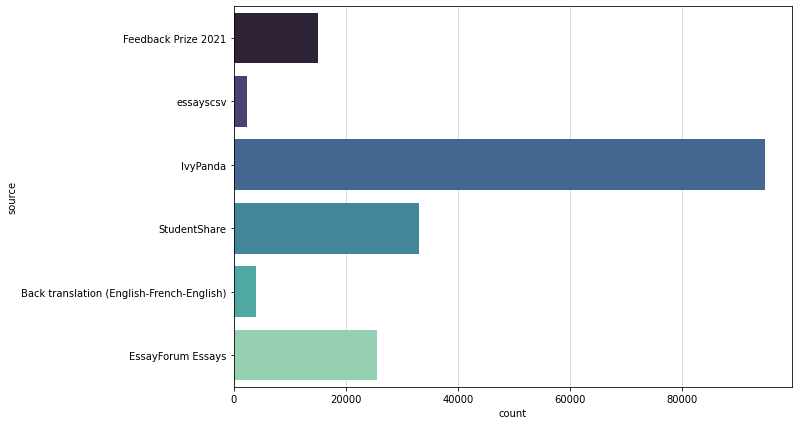

In [13]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot()
ax.grid(color="lightgrey", axis="x", zorder=0)
sns.countplot(y="source", palette="mako", data=external_dataset, zorder=2, ax=ax)
fig.show()